In [1]:
library(R.matlab)
library(ggplot2)
library(fda)
library(caTools)
library(repr)
library(MASS)

R.matlab v3.6.1 (2016-10-19) successfully loaded. See ?R.matlab for help.

Attaching package: ‘R.matlab’

The following objects are masked from ‘package:base’:

    getOption, isOpen

Loading required package: splines
Loading required package: Matrix

Attaching package: ‘fda’

The following object is masked from ‘package:graphics’:

    matplot



In [2]:
# Change plot size to 5 x 4
options(repr.plot.width=5, repr.plot.height=4)

In [3]:
# Read pre_pmcao factors for GDPCA
GDPC <- as.matrix(read.table("data/gdpca_pre_factors.rmat", as.is = TRUE))
colnames(GDPC) <- NULL
GDPC <- unname(GDPC)

# Read pre_pmcao factors for SPCA
SPCA = as.matrix(read.csv("data/factor1_pre_normalized_removed.csv"))[, 2:1001]

# Take transpose of SPCA for functional boxplots
SPCA = t(SPCA)

In [4]:
sprintf("Dims of GDPC: %s\n", dim(GDPC))
sprintf("Dims of SPCA: %s\n", dim(SPCA))

[1] "Dims of GDPC: 1000\n" "Dims of GDPC: 300\n"

[1] "Dims of SPCA: 1000\n" "Dims of SPCA: 300\n"

In [5]:
#head(GDPC)

In [6]:
#GDPC = GDPC[2:999, ]
#SPCA = SPCA[2:999, ]

In [7]:
# Collect log periodograms of factors for each epoch
log_periodograms <- function(factors, num_epochs, smooth=TRUE, window=11, tlim=500) {
    
    # Smooth the log periodograms
    smoothing <- function(log_pds, w=window) {
        sm_log_pd_list = list()
        for(i in 1:num_epochs) {
            sm_log_pd = stats::filter(log_pds[[i]], rep(1/w, w), circular=TRUE)
            sm_log_pd_list[[i]] = sm_log_pd
        }
        res <- do.call(cbind, sm_log_pd_list)
        return (res)
    }
    
    logpd.list = c()
    for (i in 1:num_epochs) {
        factor_epoch = factors[, i]
        periodogram = (abs(fft(factor_epoch)))^2
        log_pd = log(periodogram[1:tlim])
        logpd.list[[i]] = log_pd
    }
    if (smooth) {
        res <- smoothing(logpd.list)
    }
    else {
        res <- do.call(cbind, logpd.list)
    }
    return (res)
}

In [8]:
# Get log periodograms for SPCA and GDPC
Xspd = log_periodograms(SPCA, num_epochs=300)
Xgpd = log_periodograms(GDPC, num_epochs=300, smooth=FALSE)

# Plot factors for GPCA vs SPCA

In [9]:
plot_factors <- function(GDPC, SPCA, epoch) {
    ulim = max(max(SPCA[5:995, epoch], GDPC[5:995, epoch]))
    llim = min(min(SPCA[5:995, epoch], GDPC[5:995, epoch]))
    par(mar=c(6.1, 4.1, 4.1, 4.1), xpd=TRUE)
    plot(GDPC[5:995, epoch], xaxt="n", yaxt="n", type='l', ylab='',ylim=c(llim, ulim),
         main=sprintf("Epoch %s: First Factors", epoch),xlab='ms', bty="n", col="darkblue")
    lines(SPCA[5:995, epoch], col=2, xpd=FALSE)
    axis(side=1, at=seq(0, 1000, 1000))
    legend("topright", ex.cs1, cex=0.9, y.intersp=2.5,legend=c("GDPCA", "SPCA"), bty="n", 
           lty=c(1,1),col=c("darkblue", "red"), inset=c(-0.17, 0), text.font=2)
}

plot_periodograms <-function(Xgpd, Xspd, epoch) {
    ulim = max(max(Xspd[7:495, epoch], Xgpd[7:495, epoch]))
    llim = min(min(Xspd[7:495, epoch], Xgpd[7:495, epoch]))
    par(mar=c(6.1, 4.1, 4.1, 4.1), xpd=TRUE)
    plot(Xspd[7:495, epoch], xaxt="n", yaxt="n", type='l', ylab='', xlab='Hz',ylim=c(llim, ulim),
         main=sprintf("Epoch %s: Log Periodograms", epoch), bty='n', col='red')
    lines(Xgpd[7:495, epoch], col="darkblue", xpd=FALSE)
    axis(side=1, at=seq(0, 500, 500))
    legend("topright", ex.cs1, cex=0.6, y.intersp=2.5,legend=c("GDPCA", "SPCA"), bty="n", 
           lty=c(1,1),col=c("darkblue", "red"), inset=c(-0.17, 0))
}

# Pre Epoch 1

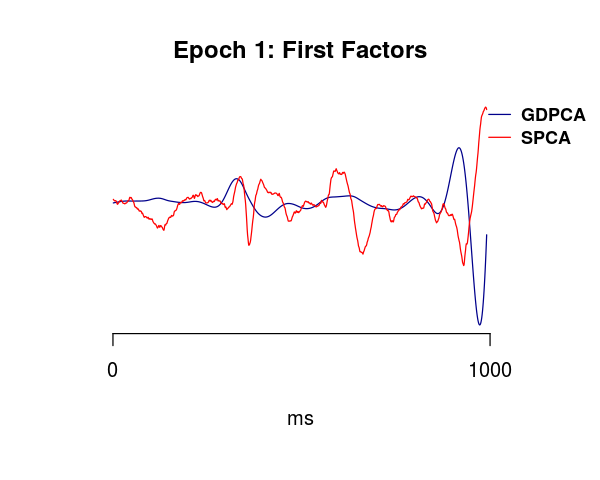

In [21]:
#png(filename = "figures/pre_factors_log/pre_factor_epoch1.png")
plot_factors(GDPC, SPCA, 1)
#dev.off()

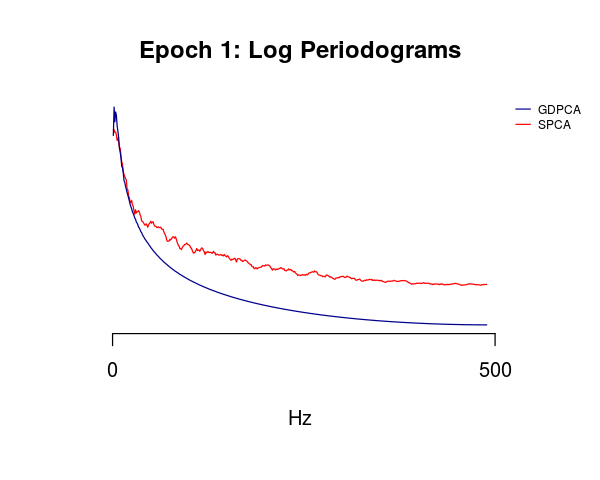

In [24]:
#png(filename = "figures/pre_factors_log/pre_log_epoch1.png")
plot_periodograms(Xgpd, Xspd, 1)
#dev.off()

# Pre Epoch 45

In [157]:
plot_factors <- function(GDPC, SPCA, epoch) {
    ulim = max(SPCA[5:995, epoch])
    llim = min(SPCA[5:995, epoch])
    par(mar=c(6.1, 0.5, 4.1, 7), xpd=TRUE)
    plot(GDPC[5:995, epoch], xaxt="n", yaxt="n", type='l', ylab='', ylim=c(llim, ulim),
         main=sprintf("Epoch %s: First Factors", epoch),xlab='ms', bty="n",
         col="darkblue")
    lines(SPCA[5:995, epoch], col=2, xpd=FALSE)
    axis(side=1, at=seq(0, 1000, 1000))
    legend("topright", ex.cs1, cex=0.9, y.intersp=2.5,legend=c("GDPCA", "SPCA"), bty="n", 
           lty=c(1,1),col=c("darkblue", "red"), inset=c(-0.4, 0), text.font=2)
}

In [158]:
epochs = c(45, 285, 296)
for(i in epochs){
    tiff(filename = sprintf("figures2/pre_factors_log/pre_factor_epoch%s.tiff", i),
         width = 5, height = 5, units = 'in', res = 600, compression = 'none')
    plot_factors(GDPC, SPCA, i)
    dev.off()
    
    #png(filename = sprintf("figures2/pre_factors_log/pre_log_epoch%s.png", i))
    #plot_periodograms(Xgpd, Xspd, i)
    #dev.off()
}

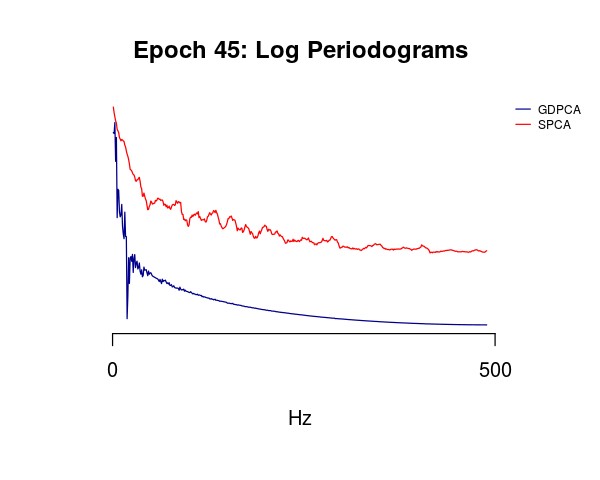

In [25]:
plot_periodograms(Xgpd, Xspd, 45)

# Pre Epoch 187

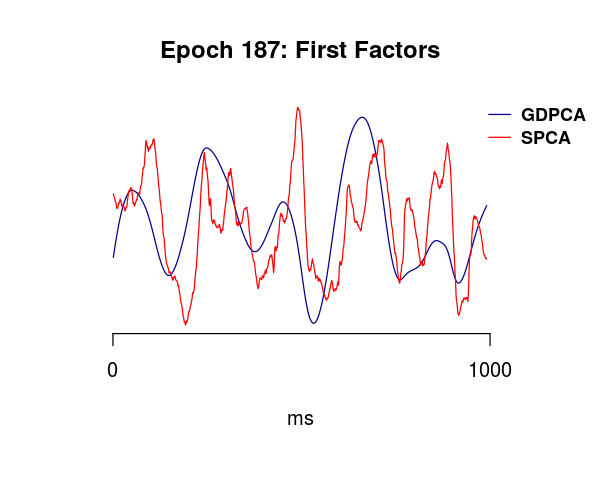

In [26]:
plot_factors(GDPC, SPCA, 187)

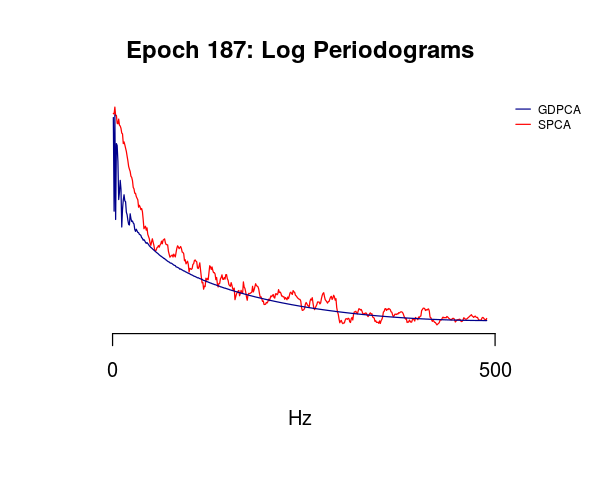

In [27]:
plot_periodograms(Xgpd, Xspd, 187)

# Pre Epoch 212

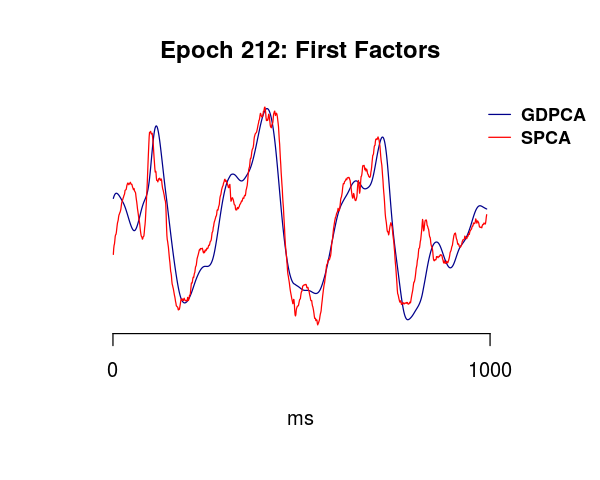

In [28]:
plot_factors(GDPC, SPCA, 212)

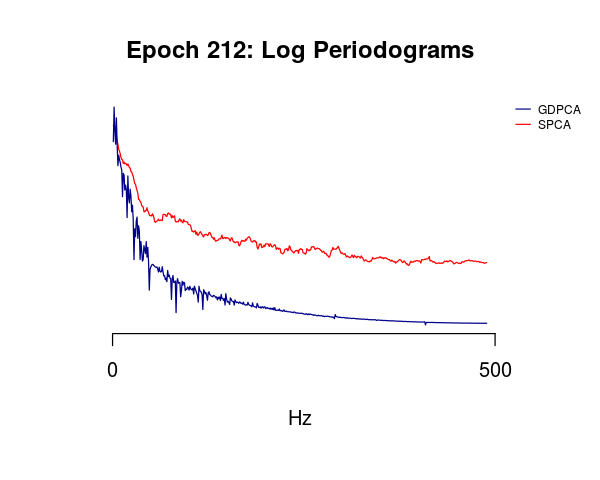

In [29]:
plot_periodograms(Xgpd, Xspd, 212)

# Pre Epoch 285

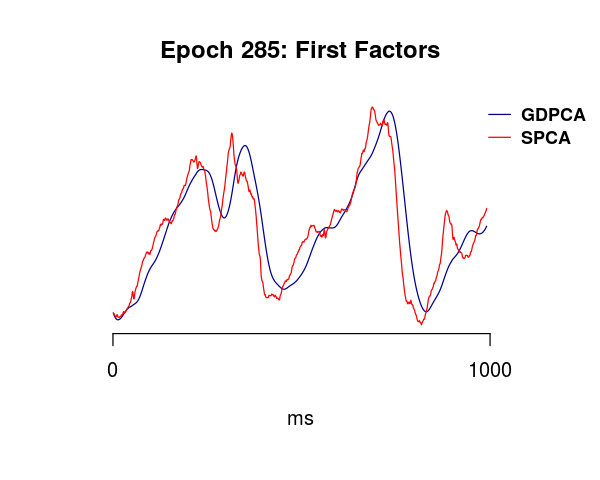

In [30]:
plot_factors(GDPC, SPCA, 285)

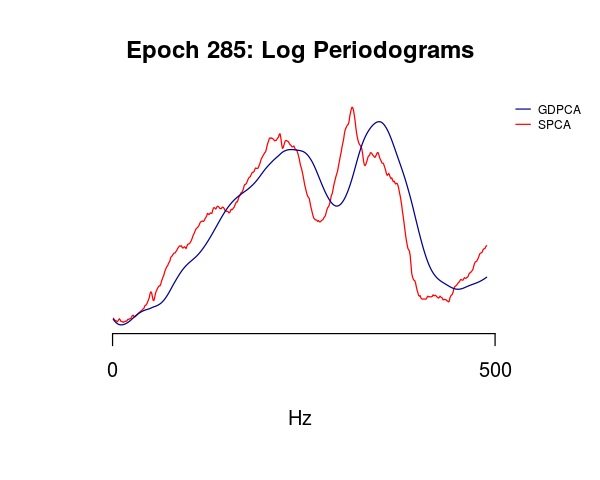

In [31]:
plot_periodograms(GDPC, SPCA, 285)

# Pre Epoch 296

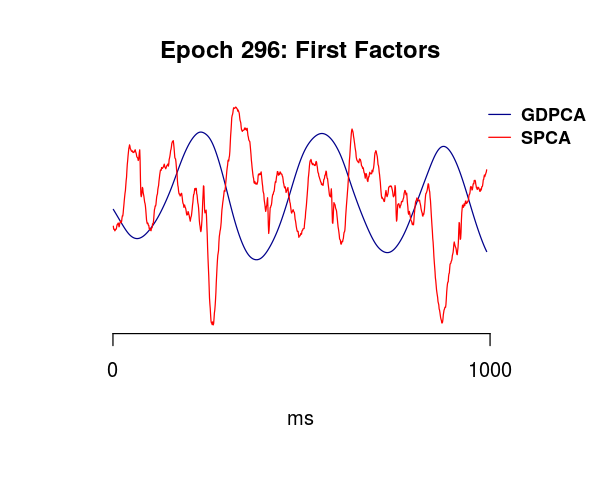

In [32]:
plot_factors(GDPC, SPCA, 296)

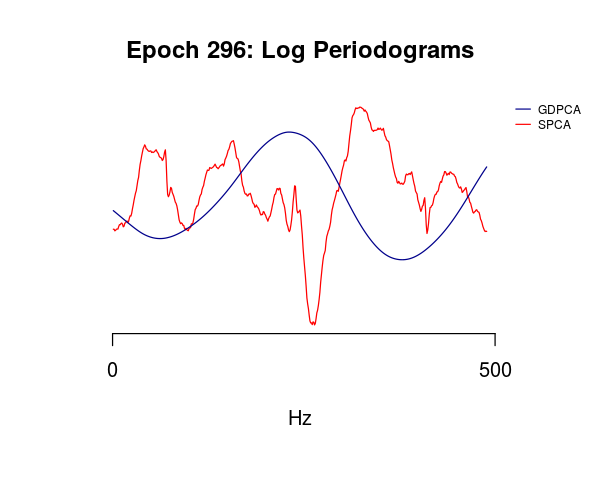

In [33]:
plot_periodograms(GDPC, SPCA, 296)

# Compare Pre LFP to Factors

In [20]:
# Read in pre_pmcao data
data = readMat('data/F141020-lfp-5min-1kHz.mat')
pre_pmcao = data$pre.pmcao

In [21]:
excludes = c(1:5, 7:8, 11:12, 14:16, 18:26, 28:32)
Z_pre = (pre_pmcao[, excludes] - mean(pre_pmcao[, excludes])) / sd(pre_pmcao[, excludes])

# LFP vs Factors

In [105]:
epochs = c(1, 45, 187, 212, 285, 296)
for(i in epochs){
    png(filename = sprintf("figures/pre_lfp_factors/pre_lfp_factors_epoch%i.png", i))
    plot_lfp_factor(Z_pre, GDPC, SPCA, i)
    #plot_factors(GDPC, SPCA, i)
    dev.off()
}

In [22]:
plot_lfp_factor <- function(lfp, gfactor, sfactor, epoch) {
    par(mar=c(6.1, 4.1, 4.1, 4.1), xpd=TRUE)
    params = list(yaxt="n", xaxt="n", ylab="", xlab="ms", 
              bty="n", main=sprintf("Epoch %s: LFPs 1-10 Channels", epoch), xpd=FALSE)
    ts.plot(lfp[((epoch-1)*1000+1):(epoch*1000),], gpars=params)
    lines(gfactor[,epoch], col='red', lwd=2)
    lines(sfactor[,epoch], col='orange', lwd=2)
    axis(side=1, at=seq(0, 1000, 1000))
    legend("topright", ex.cs1, cex=0.6, y.intersp=2.5,legend=c("GDPCA", "SPCA"), bty="n", 
           lty=c(1,1),col=c("red", "orange"), inset=c(-0.17, 0))
}

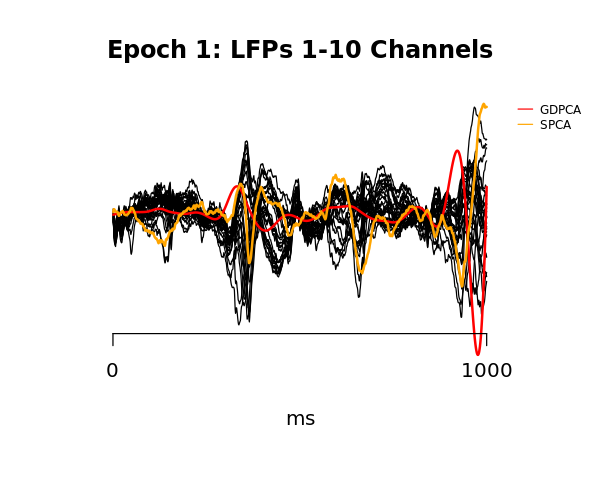

In [23]:
plot_lfp_factor(Z_pre, GDPC, SPCA, 1)

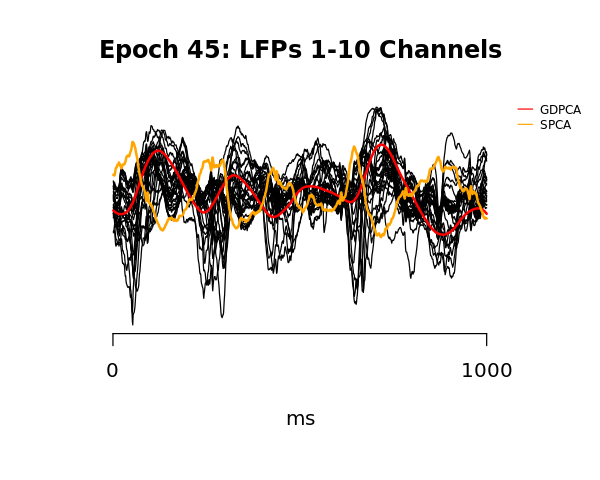

In [24]:
plot_lfp_factor(Z_pre, GDPC, SPCA, 45)

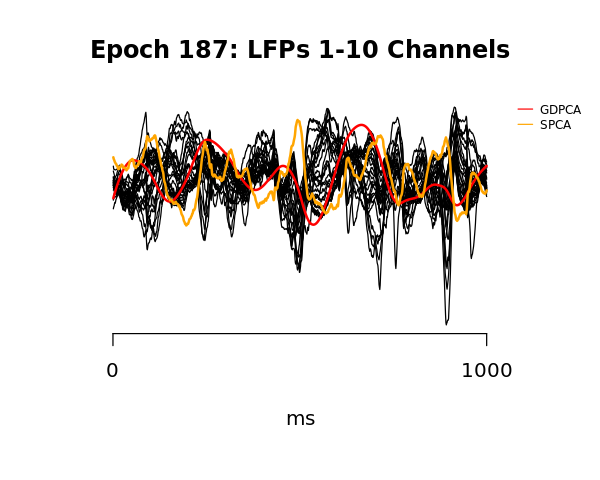

In [25]:
plot_lfp_factor(Z_pre, GDPC, SPCA, 187)

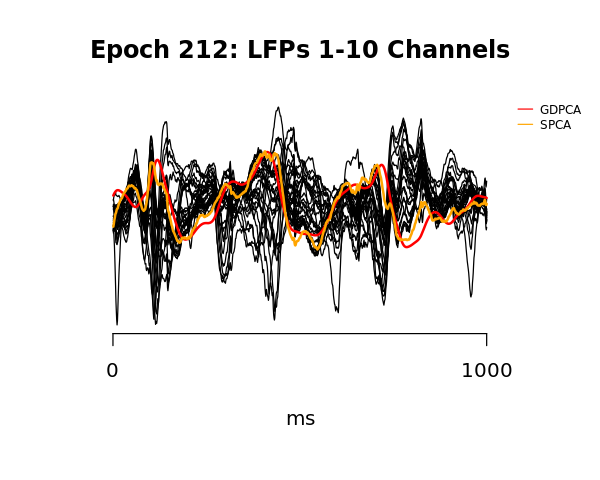

In [26]:
plot_lfp_factor(Z_pre, GDPC, SPCA, 212)

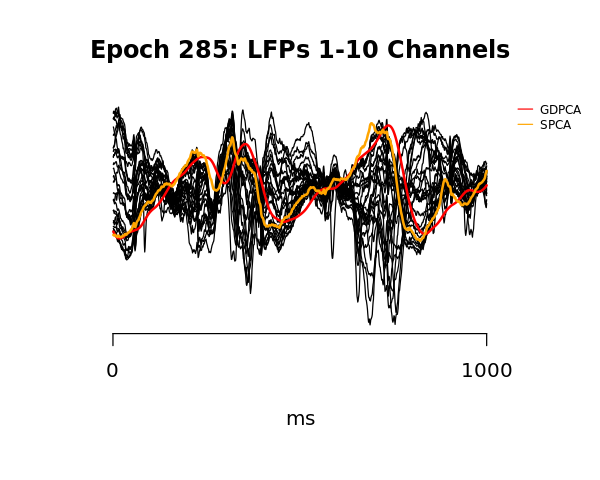

In [27]:
plot_lfp_factor(Z_pre, GDPC, SPCA, 285)

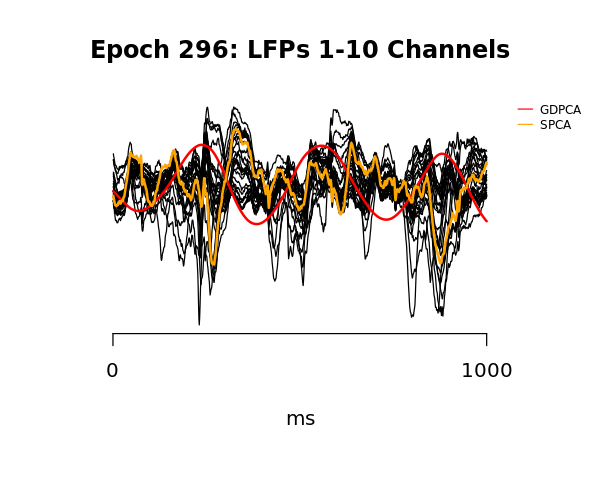

In [28]:
plot_lfp_factor(Z_pre, GDPC, SPCA, 296)

# Functional boxplots and medians

In [45]:
png(filename = "figures2/pre_functional/gdpca_pre_functional.png")
gpca_fb = fbplot(Xgpd,method='MBD',ylab="",xlab="Hz", main = "GDPCA functional boxplot", 
                 ylim=c(-10, 13),  xaxt="n", yaxt="n", bty = "n")
axis(side=1, at=seq(0, 500, 500))
dev.off()

png 
  2

In [46]:
png(filename = "figures2/pre_functional/spca_pre_functional.png")

spca_fb = fbplot(Xspd,method='MBD',ylab="",xlab="Hz", main = "SPCA functional boxplot",
                 ylim=c(-8, 11),  xaxt="n", yaxt="n", bty = "n")
axis(side=1, at=seq(0, 500, 500))
dev.off()

png 
  2

In [31]:
names(spca_fb)

[1] "depth"    "outpoint" "medcurve"

In [197]:
#png(filename = "figures2/pre_functional/pre_spca_gdpca_median.png")
tiff("hires_figures/pre/pre_spca_gdpca_median2.tiff", 
     width = 15, height = 15, units = 'in', res = 600, compression = 'none')

#Extracting the median curve for SPCA periodograms
par(mar=c(6.1, 0.3, 10.1, 15), xpd=TRUE)

spca_med = spca_fb$medcurve
plot(Xgpd[7:495,spca_med], xaxt="n", yaxt="n", bty = "n", col = "darkblue", xlab = "Hertz",
     lwd = 3, main = "Median curves", ylab = "", type = 'l', cex.main=3, cex.lab=2)
axis(side=1, at=seq(0, 500, 500), cex.axis=2, lwd=2)
gpca_med = gpca_fb$medcurve
lines(Xspd[7:495, gpca_med], col = "red", lwd=3)
legend("topright", ex.cs1, cex=2, y.intersp=2.5,legend=c("GDPCA", "SPCA"), bty="n", 
       lty=c(1,1),col=c("darkblue", "red"), inset=c(-0.1, 0), text.font=2, pt.cex=2)
dev.off()

png 
  2

# Save plots for all factors in SPCA and GDPCA

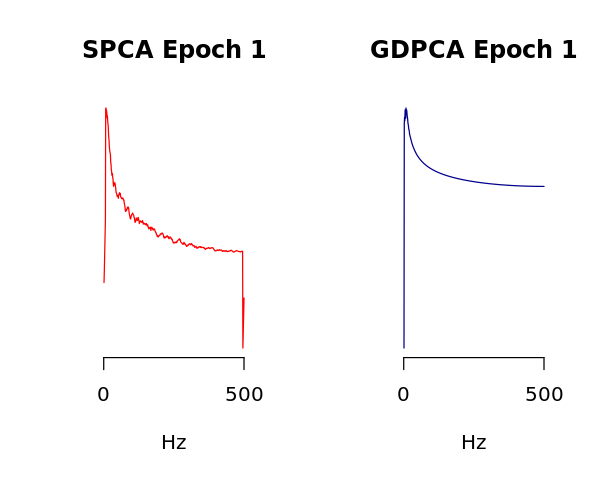

In [33]:
i = 1
par(mfrow = c(1, 2))
plot(Xspd[, i], xaxt="n", yaxt="n", type='l', ylab='',
     main=sprintf("SPCA Epoch %s", i),xlab='Hz', bty="n", col="red")
axis(side=1, at=seq(0, 500, 500))

plot(Xgpd[, i], xaxt="n", yaxt="n", type='l', ylab='',
     main=sprintf("GDPCA Epoch %s", i),xlab='Hz', bty="n", col="darkblue")
axis(side=1, at=seq(0, 500, 500))


In [10]:
collect_plots <- function(X1, X2, epoch, color, new=FALSE) {
    ulim = max(max(Xspd[7:495, epoch]), max(Xgpd[7:495, epoch]))
    llim = min(min(Xspd[7:495, epoch]), min(Xgpd[7:495, epoch]))
    # Setup side-by-side
    par(mfrow = c(1, 2))
    plot(X1[7:495, epoch], xaxt="n", yaxt="n", type='l', ylab='', ylim=c(llim, ulim),
     main=sprintf("SPCA Epoch %s", epoch),xlab='Hz', bty="n", col=color)
    axis(side=1, at=seq(0, 500, 500))

    plot(X2[7:495, epoch], xaxt="n", yaxt="n", type='l', ylab='', ylim=c(llim, ulim),
     main=sprintf("GDPCA Epoch %s", epoch),xlab='Hz', bty="n", col=color)
    axis(side=1, at=seq(0, 500, 500))
}

In [13]:
epoch = 1

png(filename="frames/1.png", width=7, height=4, units='in', res=300)
collect_plots(Xspd, Xgpd, epoch, color="red")
dev.off()
#collect_plots(Xspd, Xgpd, epoch, color="black", new=TRUE)

png 
  2

In [15]:
ulim = max(max(Xspd[7:495, ]), max(Xgpd[7:495, ]))
llim = min(min(Xspd[7:495, ]), min(Xgpd[7:495, ]))
for(i in 101:300) {

    png(filename = sprintf("frames/%s.png", i), width=7, height=4, units='in', res=300)
    par(mfrow = c(1, 2))
    plot(Xspd[7:495, i], xaxt="n", yaxt="n", type='l', ylab='', ylim=c(llim, ulim),
    main=sprintf("SPCA Epoch %s", i),xlab='Hz', bty="n", col="black")
    axis(side=1, at=seq(0, 500, 500))
    
    for(j in 1:i) {
        lines(Xspd[7:495, j], col = "black")
    }
    lines(Xspd[7:495, i], col = "red", lwd = 2)
    
    plot(Xgpd[7:495, i], xaxt="n", yaxt="n", type='l', ylab='', ylim=c(llim, ulim),
    main=sprintf("GDPCA Epoch %s", i),xlab='Hz', bty="n", col="black")
    axis(side=1, at=seq(0, 500, 500))
    
    for(j in 1:i) {
        lines(Xgpd[7:495, j], col = "black")
    }
    lines(Xgpd[7:495, i], col = "red", lwd = 2)
    dev.off()
    
}

# Post factors

In [68]:
# Read post_pmcao factors for GDPCA
GDPC_post <- as.matrix(read.table("data/gdpca_post_factors.rmat", as.is = TRUE))
colnames(GDPC_post) <- NULL
GDPC_post <- unname(GDPC_post)

# Read pre_pmcao factors for SPCA
SPCA_post = as.matrix(read.csv("data/factor1_post_normalized_removed.csv"))[, 2:1001]

# Take transpose of SPCA for functional boxplots
SPCA_post = t(SPCA_post)

sprintf("Dims of GDPC: %s\n", dim(GDPC_post))
sprintf("Dims of SPCA_post: %s\n", dim(SPCA_post))

[1] "Dims of GDPC: 1000\n" "Dims of GDPC: 300\n"

[1] "Dims of SPCA_post: 1000\n" "Dims of SPCA_post: 300\n"

In [69]:
# Change plot size to 5 x 4
options(repr.plot.width=5, repr.plot.height=4)

In [70]:
# plot_factors <- function(GDPC, SPCA, epoch) {
#     par(mar=c(6.1, 4.1, 4.1, 4.1), xpd=TRUE)
#     plot(GDPC[, epoch], xaxt="n", yaxt="n", type='l', ylab='',
#          main=sprintf("Epoch %s: First Factors", epoch),xlab='ms', bty="n", col="darkblue")
#     lines(SPCA[, epoch], col=2, xpd=FALSE)
#     axis(side=1, at=seq(0, 1000, 1000))
#     legend("topright", ex.cs1, cex=0.6, y.intersp=2.5,legend=c("GDPCA", "SPCA"), bty="n", 
#            lty=c(1,1),col=c("darkblue", "red"), inset=c(-0.17, 0))
# }

# plot_periodograms <-function(Xgpd, Xspd, epoch) {
#     par(mar=c(6.1, 4.1, 4.1, 4.1), xpd=TRUE)
#     plot(Xspd[, epoch], xaxt="n", yaxt="n", type='l', ylab='', xlab='Hz',
#          main=sprintf("Epoch %s: Log Periodograms", epoch), bty='n', col='red')
#     lines(Xgpd[, epoch], col="darkblue", xpd=FALSE)
#     axis(side=1, at=seq(0, 500, 500))
#     legend("topright", ex.cs1, cex=0.6, y.intersp=2.5,legend=c("GDPCA", "SPCA"), bty="n", 
#            lty=c(1,1),col=c("darkblue", "red"), inset=c(-0.17, 0))
# }

In [71]:
# Get log periodograms for SPCA and GDPC
Xs_post = log_periodograms(SPCA_post, num_epochs=300)
Xg_post = log_periodograms(GDPC_post, num_epochs=300, smooth=FALSE)

In [41]:
#dim(Xg_post)

# Post Epoch 1

In [143]:
plot_factors <- function(GDPC, SPCA, epoch) {
    par(mar=c(6.1, 0.5, 4.1, 7), xpd=TRUE)
    plot(GDPC[5:995, epoch], xaxt="n", yaxt="n", type='l', ylab='',
         main=sprintf("Epoch %s: First Factors", epoch),xlab='ms', bty="n",
         col="darkblue")
    lines(SPCA[5:995, epoch], col=2, xpd=FALSE)
    axis(side=1, at=seq(0, 1000, 1000))
    legend("topright", ex.cs1, cex=0.9, y.intersp=2.5,legend=c("GDPCA", "SPCA"), bty="n", 
           lty=c(1,1),col=c("darkblue", "red"), inset=c(-0.4, 0), text.font=2)
}

In [144]:
epochs = c(45,285, 296)
for(i in epochs){
    tiff(filename = sprintf("figures2/post_factors_log/post_factor_epoch%s.tiff", i),
         width=5, height=5, units='in', res=600, compression='none')
    plot_factors(GDPC_post, SPCA_post, i)
    dev.off()
    
    #tiff(filename = sprintf("figures2/post_factors_log/post_log_epoch%s.tiff", i),
    #    width=10, height=10, units='in', res=600, compression='none')
    #plot_periodograms(Xg_post, Xs_post, i)
    #dev.off()
}

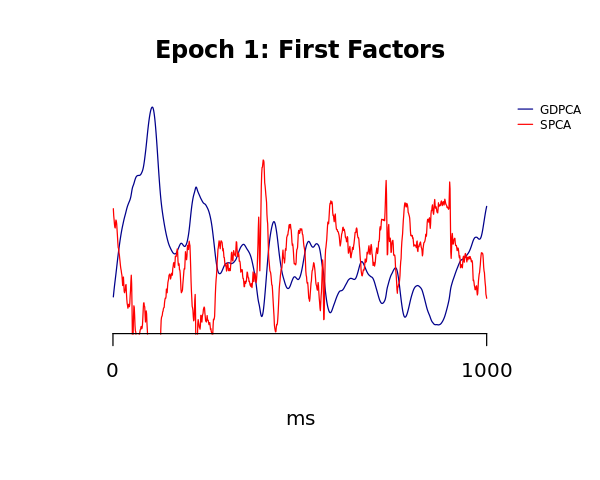

In [42]:
plot_factors(GDPC_post, SPCA_post, 1)

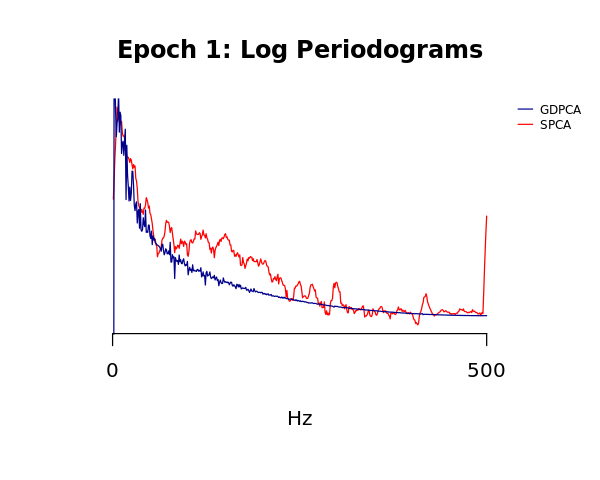

In [43]:
plot_periodograms(Xg_post, Xs_post, 1)

# Post Epoch 45

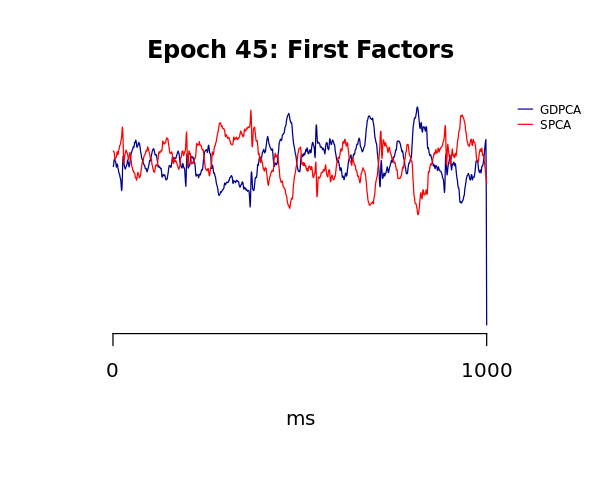

In [44]:
plot_factors(GDPC_post, SPCA_post, 45)

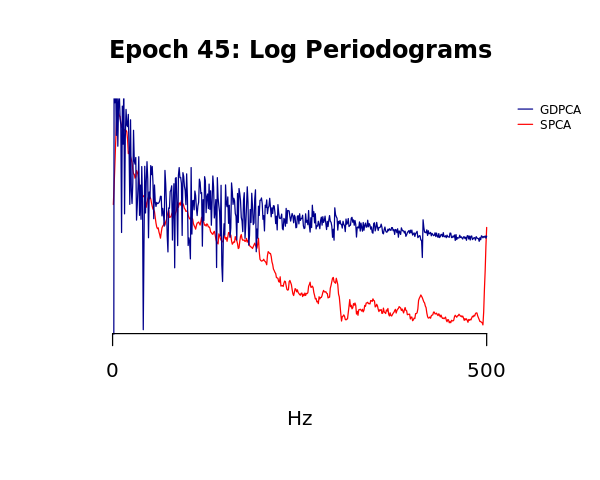

In [45]:
plot_periodograms(Xg_post, Xs_post, 45)

# Post Epoch 187

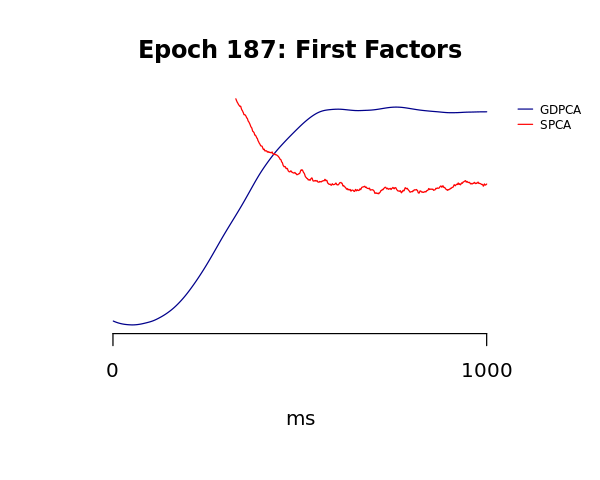

In [46]:
plot_factors(GDPC_post, SPCA_post, 187)

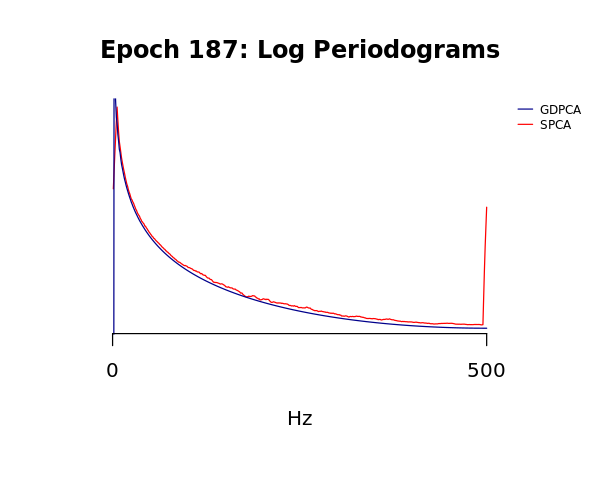

In [112]:
plot_periodograms(Xg_post, Xs_post, 187)

# Post Epoch 212

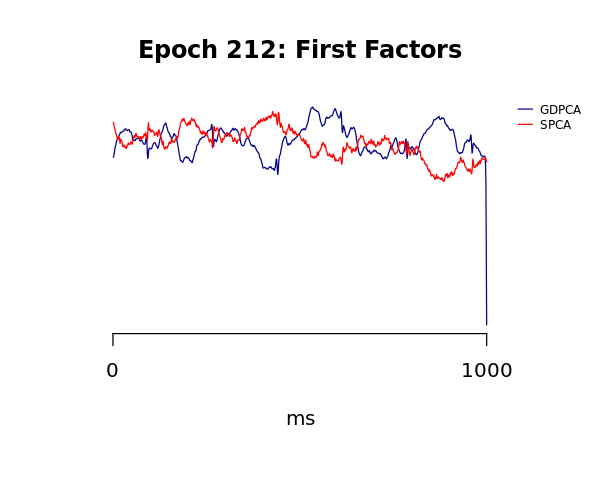

In [48]:
plot_factors(GDPC_post, SPCA_post, 212)

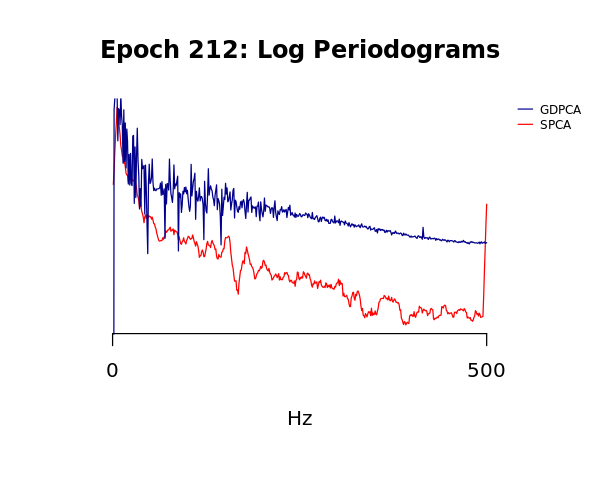

In [49]:
plot_periodograms(Xg_post, Xs_post, 212)

# Post Epoch 285

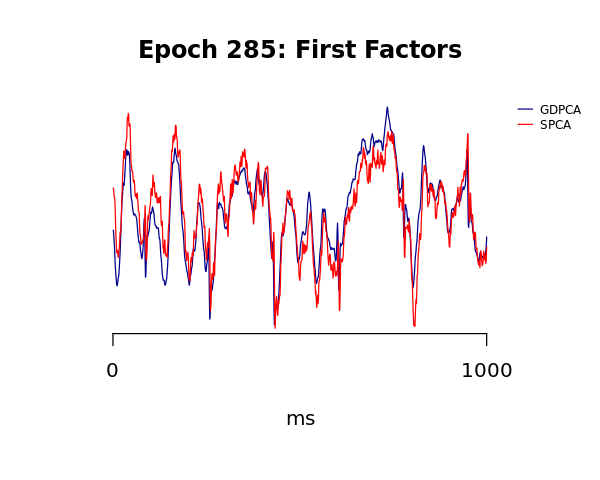

In [50]:
plot_factors(GDPC_post, SPCA_post, 285)

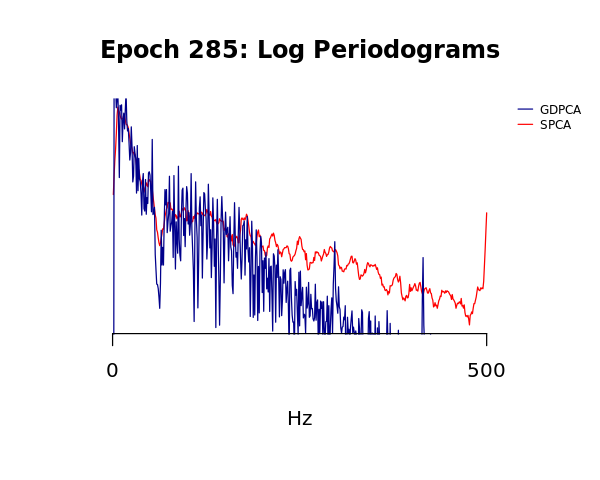

In [51]:
plot_periodograms(Xg_post, Xs_post, 285)

# Post Epoch 296

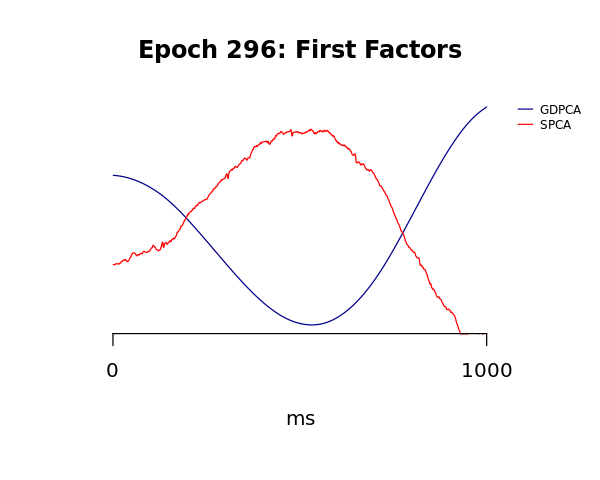

In [52]:
plot_factors(GDPC_post, SPCA_post, 296)

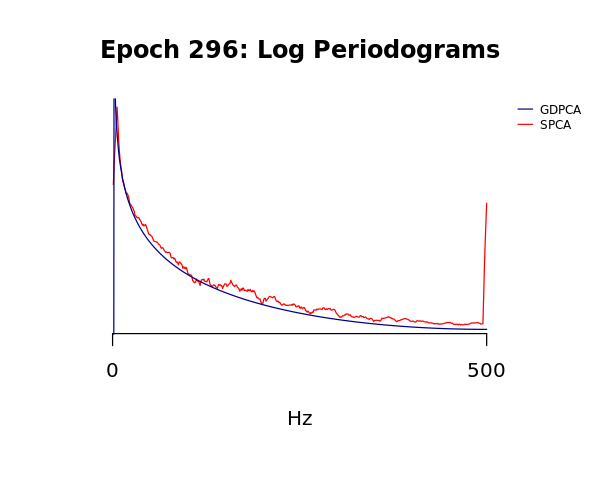

In [53]:
plot_periodograms(Xg_post, Xs_post, 296)

In [57]:
# Read in post_pmcao data
post_pmcao = data$post.pmcao

In [82]:
excludes = c(1:5, 7:8, 11:12, 14:16, 18:26, 28:32)
Z_post = (post_pmcao - mean(post_pmcao)) / sd(post_pmcao)
Z_post = Z_post[, excludes]

In [86]:
gp = (GDPC_post[,1] - mean(GDPC_post[,1])) / sd(post_pmcao[,excludes])

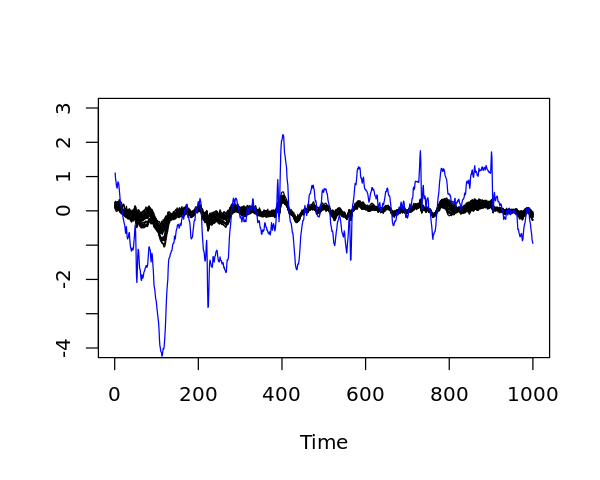

In [90]:
ts.plot(Z_post[1:1000,], ylim=c(-4,3))
lines(SPCA_post[,1], col=4)

In [ ]:
#plot_lfp_factor(Z_post, GDPC_post, SPCA_post, 1)

In [ ]:
#plot_lfp_factor(Z_post, GDPC_post, SPCA_post, 45)

In [ ]:
#plot_lfp_factor(Z_post, GDPC_post, SPCA_post, 187)

In [ ]:
#plot_lfp_factor(Z_post, GDPC_post, SPCA_post, 212)

In [ ]:
#plot_lfp_factor(Z_post, GDPC_post, SPCA_post, 285)

In [ ]:
#plot_lfp_factor(Z_post, GDPC_post, SPCA_post, 296)

In [ ]:
#var(SPCA_post[,296])

# Post Functional boxplots and medians

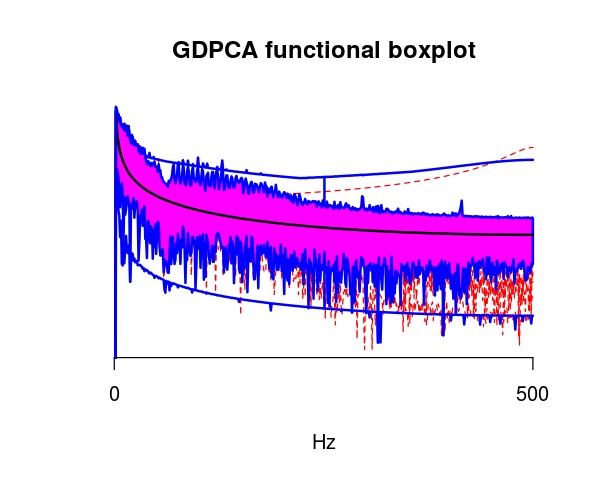

In [181]:
#png(filename = "figures/post_functional/gdpca_post_functional.png")

gpca_post_fb = fbplot(Xg_post,method='MBD',ylab="",xlab="Hz", main = "GDPCA functional boxplot", 
                 ylim=c(-10, 13),  xaxt="n", yaxt="n", bty = "n")
axis(side=1, at=seq(0, 500, 500))
#dev.off()

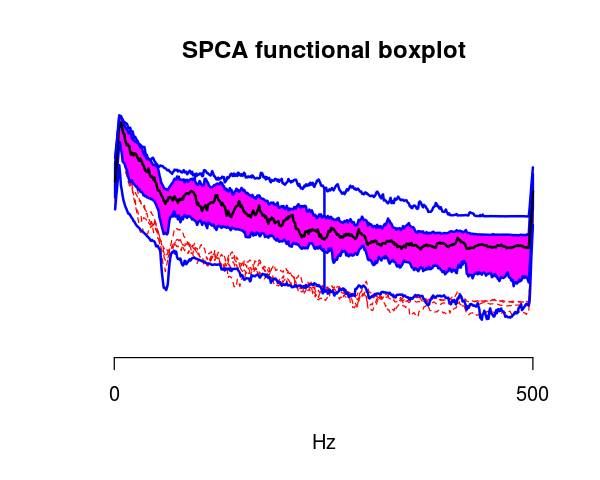

In [182]:
#png(filename = "figures/post_functional/spca_post_functional.png")

spca_post_fb = fbplot(Xs_post,method='MBD',ylab="",xlab="Hz", main = "SPCA functional boxplot",
                 ylim=c(-8, 11),  xaxt="n", yaxt="n", bty = "n")
axis(side=1, at=seq(0, 500, 500))
#dev.off()

In [196]:
tiff("hires_figures/post/post_spca_gdpca_median2.tiff", 
     width = 15, height = 15, units = 'in', res = 600, compression = 'none')

#png(filename = "figures/post_functional/post_spca_gdpca_median.png")

#Extracting the median curve for SPCA periodograms
par(mar=c(6.1, 0.3, 10.1, 15), xpd=TRUE)

spca_post_med = spca_post_fb$medcurve
plot(Xs_post[5:495,spca_post_med], xaxt="n", yaxt="n", bty = "n", col = "red", xlab = "Hz",
     lwd = 3, main = "Median curves", ylab = "", type = 'l', cex.main=3, cex.lab=2, cex.axis=2)
axis(side=1, at=seq(0, 500, 500), cex.axis=2, lwd=2)

gpca_post_med = gpca_post_fb$medcurve
lines(Xg_post[5:495, gpca_post_med], col = "darkblue", lwd=3)
legend("topright", ex.cs1, cex=2, y.intersp=2.5,legend=c("GDPCA", "SPCA"), bty="n", 
       lty=c(1,1),col=c("darkblue", "red"), inset=c(-0.1, 0), text.font=2, pt.cex=2)
dev.off()

png 
  2